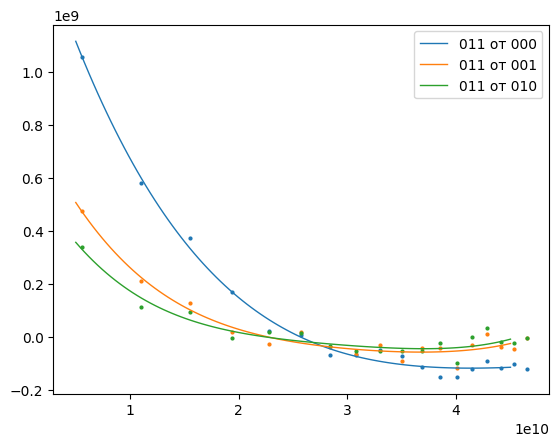

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('files/smspecs_yearly.xlsx', sheet_name=None,  index_col=0)

n=3 # количество событий
deg=4 # степень полинома

coef=np.empty((deg+1)*(2**n)**2, 'float64').reshape(2**n, 2**n, deg+1)
for i in range(2**n):
    # vi=format(i, '0{}b'.format(n))+'-xxxx'*n
    bi=bin(i)[2:].zfill(n)
    vi=bi+'-xxxx'*n
    for j in range(2**n):
        bj=bin(j)[2:].zfill(n)
        vj=bj+'-xxxx'*n
        # строим тренд
        if (i&j>0 and bj.count('1')>bi.count('1')) or i==0:
            fp = np.polyfit(df[vj].total, df[vj].yearly-df[vi].yearly, deg)
            coef[i][j]=fp
        else:
            coef[i][j]=[np.nan]*(deg+1)
        
v=3
vstr=format(v, '0{}b'.format(n))+'-xxxx'*n
x=np.linspace(0.5*(10**10), 4.5*(10**10), 100)            
for i in range(len(coef)):
    if not np.isnan(coef[i][v]).any():
        f = np.poly1d(coef[i][v])
        vi=format(i, '0{}b'.format(n))+'-xxxx'*n
        plt.plot(x, f(x), linewidth=1, label=f'{vstr[:3]} от {vi[:3]}')
        plt.scatter(df[vstr].total, df[vstr].yearly-df[vi].yearly, s=4)
plt.legend()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n=3
df= pd.read_excel('files/smspecs_yearly.xlsx', sheet_name=None,  index_col=0)

# modelvariants=[]
# df={}

# minyear=2015
# maxyear=2024
# for v in range(2**n):
#     bitstr=format(v, '0{}b'.format(n)) 
#     for y1 in range(minyear, maxyear, 4) if bitstr[0]=='1' else ['xxxx']:
#         for y2 in range(minyear, maxyear, 4) if bitstr[1]=='1' else ['xxxx']:
#             for y3 in range(minyear, maxyear, 4) if bitstr[2]=='1' else ['xxxx']:
#                 name=f"{bitstr}-{y1}-{y2}-{y3}"
#                 modelvariants.append(name)
#                 if name in df1:
#                     df[name]=df1[name]

res_df=pd.DataFrame()
for i in range(2**n):
    bi=bin(i)[2:].zfill(n)
    for j in range(2**n):
        bj=bin(j)[2:].zfill(n)
        if ((i&j>0 and bj.count('1')>bi.count('1')) or i==0) and i!=j:
            ikeys=[k for k in df.keys() if k.startswith(bi)]        
            jkeys=[k for k in df.keys() if k.startswith(bj)]
            for ik in ikeys:
                iyears=[int(y) for y in ik[4:].replace('xxxx', '0').split('-')]
                for jk in jkeys:
                    jyears=[int(y) for y in jk[4:].replace('xxxx', '0').split('-')]
                    flag=True
                    for v, s in enumerate(bi):
                        flag=flag&(jyears[v]>=iyears[v] and iyears[v]==0)
                    if flag:
                       g=pd.DataFrame()
                       g['x']=df[jk].total
                       g['y']=df[jk].yearly-df[ik].yearly
                       g['v']=bj
                       g=g.loc[g.y.cumsum()>0]
                       for v, s in enumerate(bj):
                           g['x'+str(v+1)]=[(g.iloc[0].x if len(g)>0 else 0) if s=='1' else 0]*len(g) 
                       for v, s in enumerate(bi):
                            g['year_v'+str(v+1)]=[jyears[v]]*len(g)
                       for v, s in enumerate(bi):
                            g['base_year_v'+str(v+1)]=[iyears[v]]*len(g)
                       res_df = pd.concat([res_df, g])
res_df.to_excel('files/train_big.xlsx')